In [187]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_page(p):
    url = 'https://auto.drom.ru/all/page{}/?minpower=50'.format(p)
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    books = tree.find_all('a', {"class": "css-4zflqt e1huvdhj1"})

    infa = []

    for book in books:
        pric = book.find('span', {"class": "css-46itwz e162wx9x0"}).text[0:-2]
        price = int(pric.replace('\xa0', ''))
        try:
            info = book.find('div', {"class": "css-16kqa8y e3f4v4l2"}).text
        except:
            info = book.find('div', {"class": "css-d4igzo e3f4v4l2"}).text
        year = int(info.split(',')[1])
        model = info.split(',')[-2]
        dvig = list(book.find('span', {'class' : "css-1l9tp44 e162wx9x0"}))[0]
        volume = float(dvig[:3])
        if volume < 10:
            volume = volume
        else:
            volume = None
        hors = dvig[-9:-5]
        horse = int(hors.strip('('))
        tip = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[1].text
        typpe = tip.strip(',')
        try:
            corob = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[2].text
            box = corob.strip(',')
            if box == 'АКПП' or box == 'вариатор' or box == 'механика' or box == 'автомат' or box == 'робот Коробка':
                box = box
            else:
                box = None            
        except:
            box = None           
        prob = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[-1].text.strip(' км')
        try:
            probeg = int(prob.replace(' ', ''))
        except:
            probeg = 0 #делаем ноль, потому что чаще всего это новые машины, и лишь иногда у машин просто не указан пробег
        try:
            priv = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[3].text
            privod = priv.strip(',')
        except:
            privod = None
        infa.append({'Цена': price, 'Год': year, 'Модель' : model, 'Двигатель (л)' : volume, 'ЛС': horse, 'Коробка': box, 'Тип': typpe, 'Привод': privod, 'Пробег, км': probeg})

    return infa

infa = []

for p in range(1, 101):
    infa.extend(get_page(p))

df = pd.DataFrame(infa)
print(df.shape)
df

(2000, 9)


,Цена,Год,Модель,Двигатель (л),ЛС,Коробка,Тип,Привод,"Пробег, км"
0,5590000,2020,BMW 5-Series,2.0,184,АКПП,бензин,задний,31400
1,4250000,2022,Toyota bZ4X,NaN,214,АКПП,электро,4WD,212
2,5200000,2023,BYD Tang,1.5,137,вариатор,бензин,передний,200
3,1590000,2015,Nissan Teana,2.5,173,вариатор,бензин,передний,124000
4,3850000,2023,Geely Monjaro,2.0,238,АКПП,бензин,4WD,10
...,...,...,...,...,...,...,...,...,...
1995,1380000,2011,Honda Stream,1.8,140,АКПП,бензин,передний,96000
1996,1125000,2012,Honda Freed,1.5,118,вариатор,бензин,передний,65000
1997,2230000,2016,Nissan X-Trail,2.0,144,вариатор,бензин,4WD,148801
1998,1756500,2015,Volkswagen Tiguan,1.4,150,None,бензин,передний,80000


In [174]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [175]:
df.drop('index', axis=1, inplace=True)

In [176]:
df.isna().sum()

Цена             0
Год              0
Модель           0
Двигатель (л)    0
ЛС               0
Коробка          0
Тип              0
Привод           0
Пробег, км       0
dtype: int64

In [177]:
df.loc[df['Тип'] == 'электро', 'Двигатель (л)'] = None

In [178]:
df

,Цена,Год,Модель,Двигатель (л),ЛС,Коробка,Тип,Привод,"Пробег, км"
0,5590000,2020,BMW 5-Series,2.0,184,АКПП,бензин,задний,31400
1,5200000,2023,BYD Tang,1.5,137,вариатор,бензин,передний,200
2,1590000,2015,Nissan Teana,2.5,173,вариатор,бензин,передний,124000
3,3850000,2023,Geely Monjaro,2.0,238,АКПП,бензин,4WD,10
4,7950000,2024,Li L9,1.5,154,АКПП,гибрид,4WD,5
...,...,...,...,...,...,...,...,...,...
1798,1850000,2018,Subaru Levorg,1.6,170,вариатор,бензин,4WD,105555
1799,1550000,2012,Volkswagen Tiguan,2.0,200,АКПП,бензин,4WD,151000
1800,1380000,2011,Honda Stream,1.8,140,АКПП,бензин,передний,96000
1801,1125000,2012,Honda Freed,1.5,118,вариатор,бензин,передний,65000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Цена           1803 non-null   int64  
 1   Год            1803 non-null   int64  
 2   Модель         1803 non-null   object 
 3   Двигатель (л)  1803 non-null   float64
 4   ЛС             1803 non-null   int64  
 5   Коробка        1803 non-null   object 
 6   Тип            1803 non-null   object 
 7   Привод         1803 non-null   object 
 8   Пробег, км     1803 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 126.9+ KB


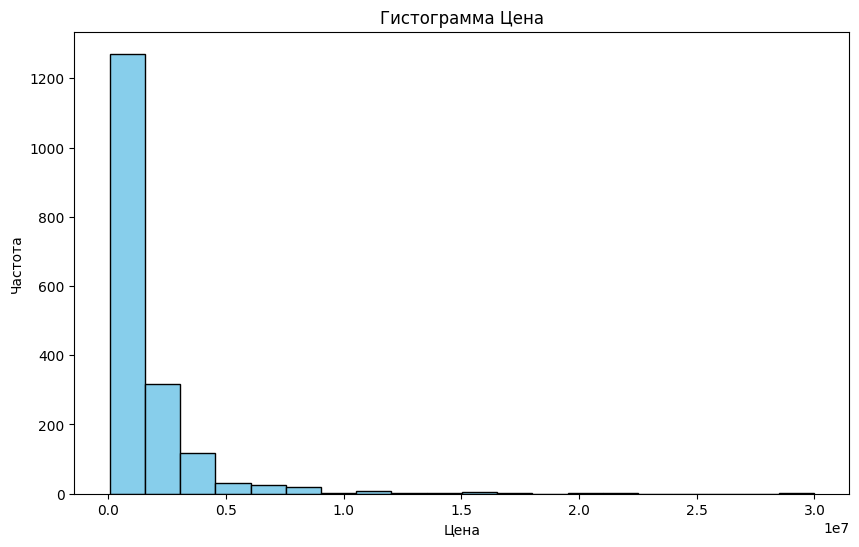

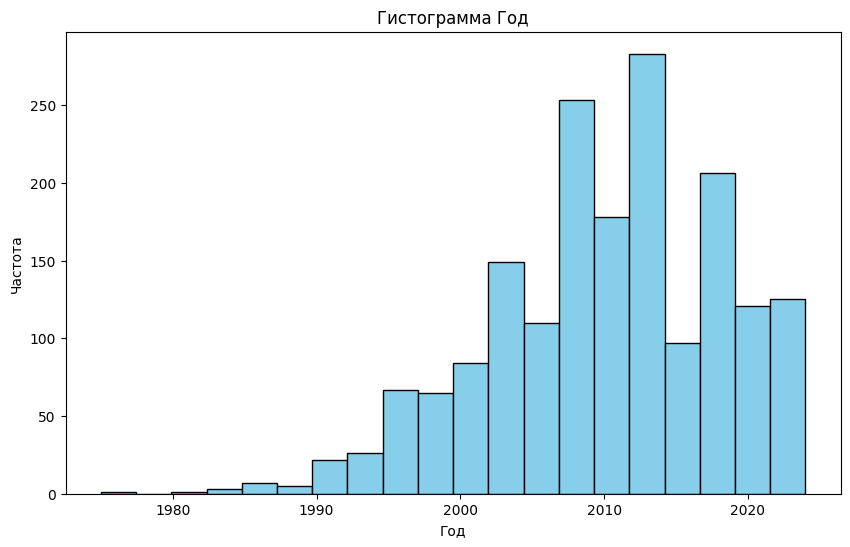

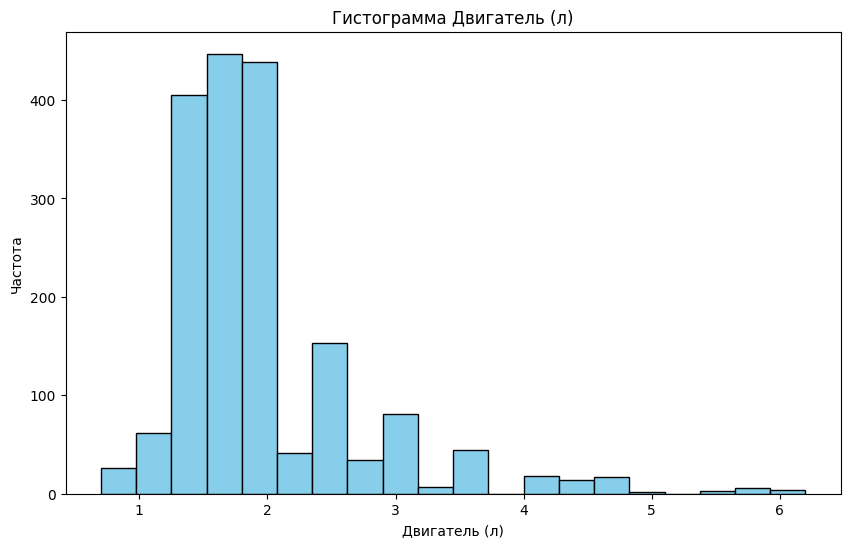

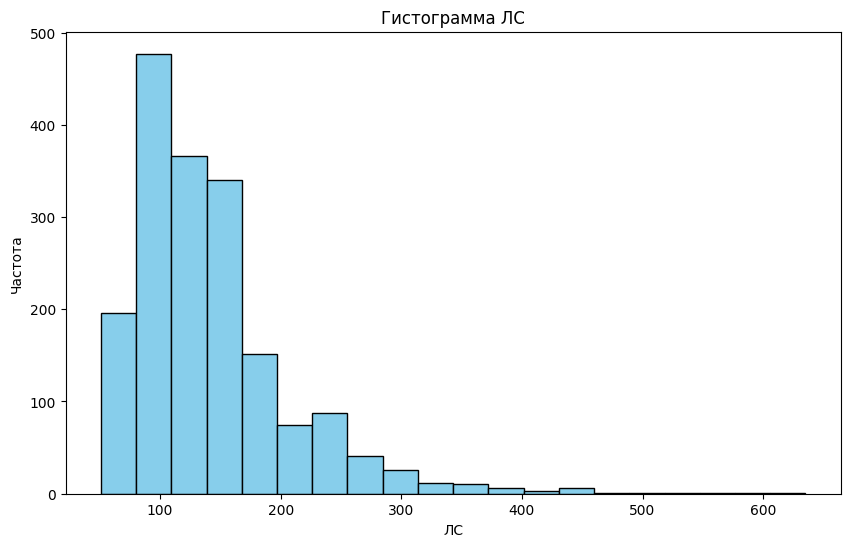

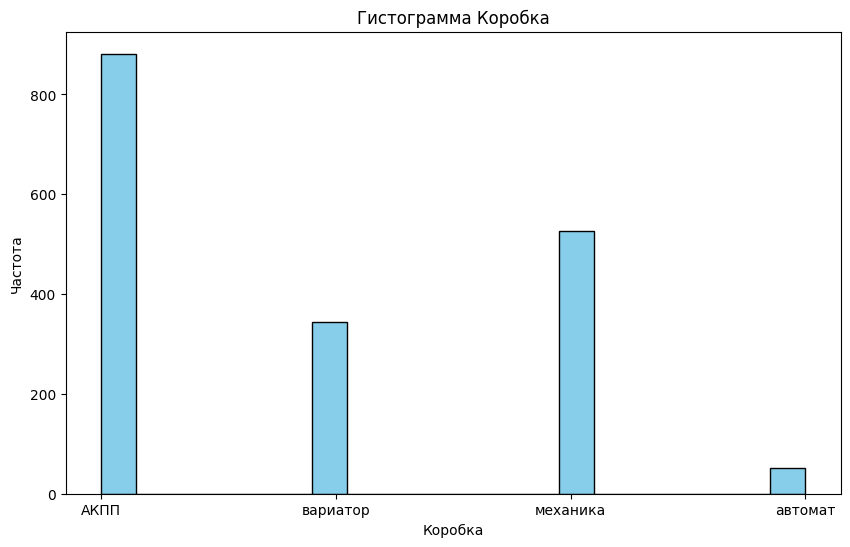

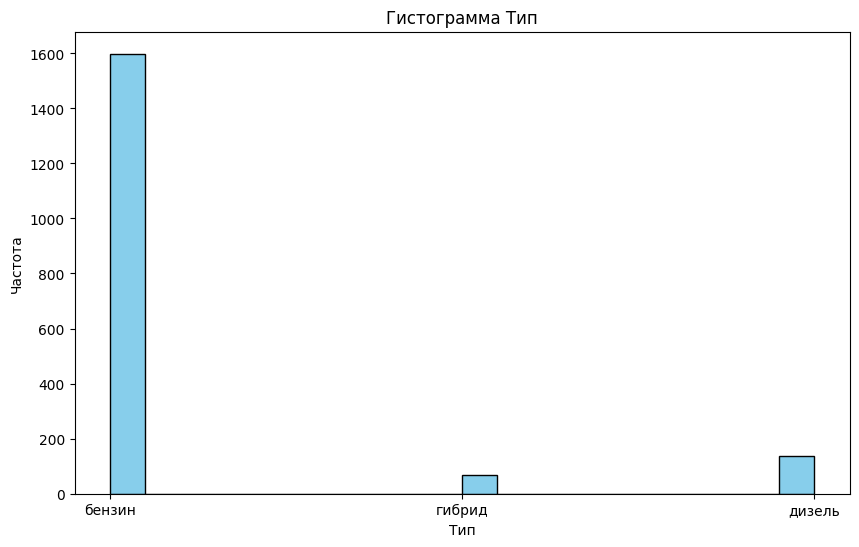

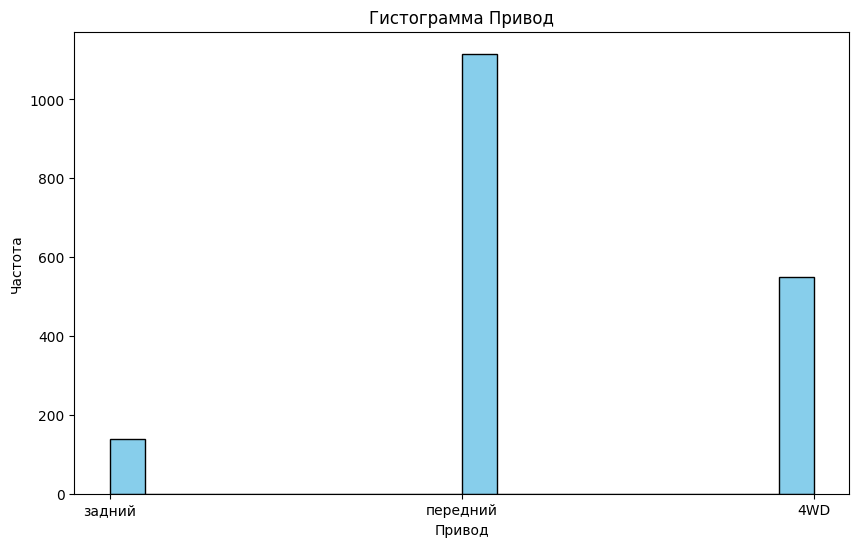

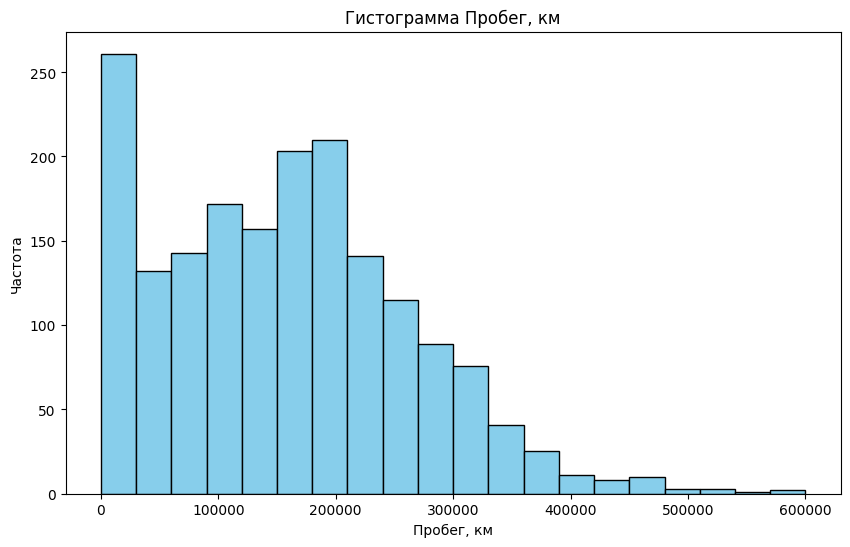

In [184]:
for column in df.columns:
    if column != 'Модель':
        plt.figure(figsize=(10, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.title(f'Гистограмма {column}')

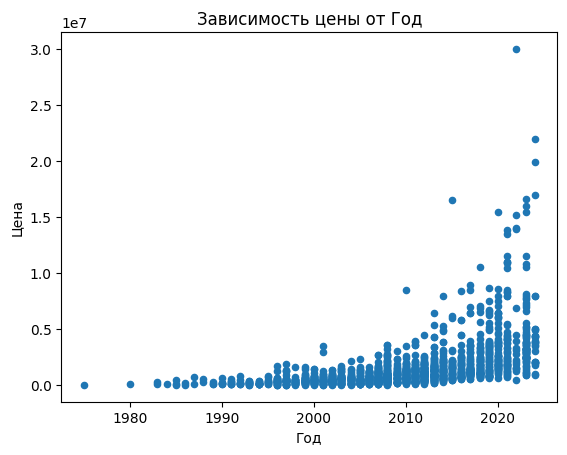

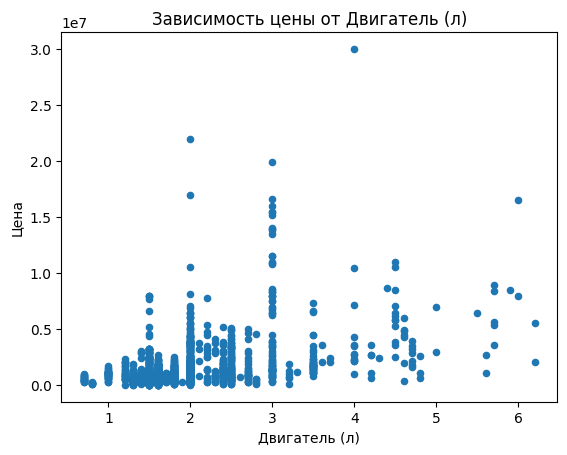

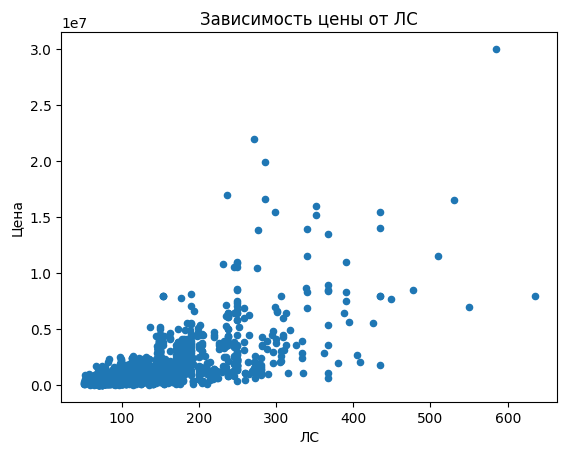

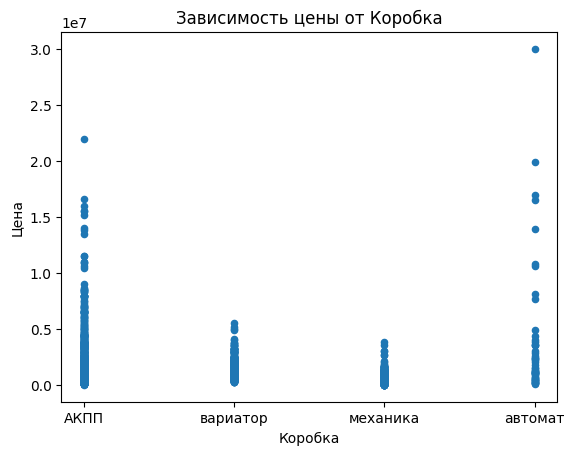

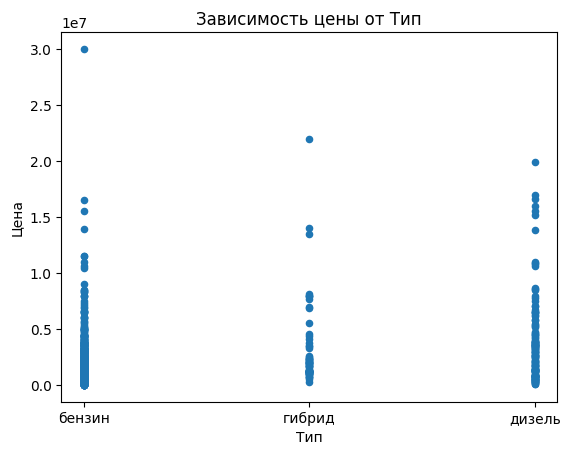

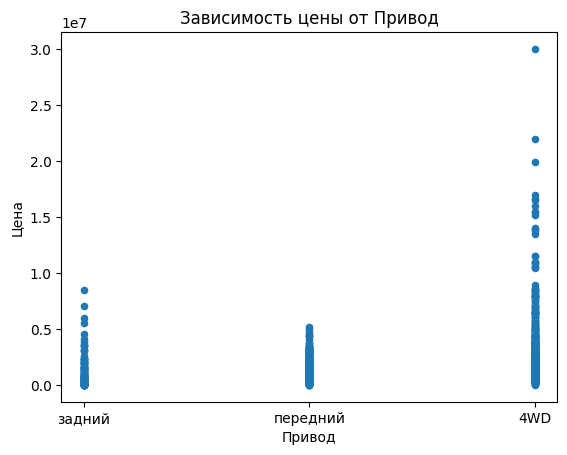

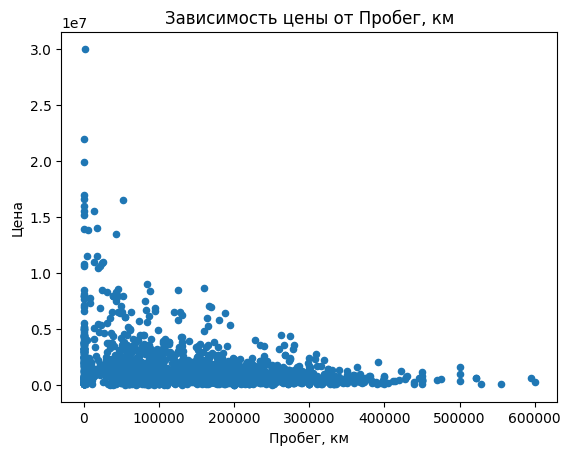

In [185]:
for column in df.columns:
    if column != 'Цена' and column != 'Модель' :  
        df.plot(x=column, y='Цена', kind='scatter')
        plt.xlabel(column)
        plt.ylabel('Цена')
        plt.title(f'Зависимость цены от {column}')
        plt.show()

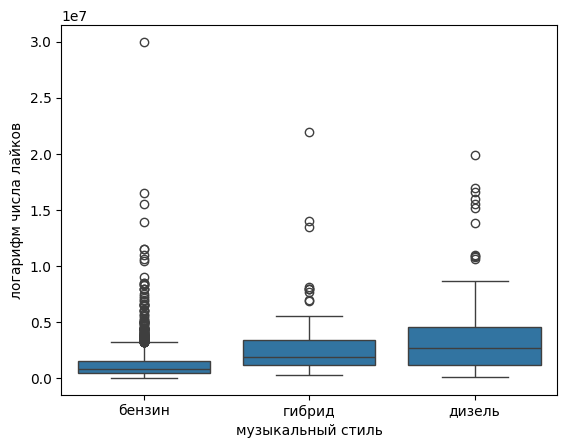

In [196]:
sns.boxplot(x='Тип', y='Цена', data=df)

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

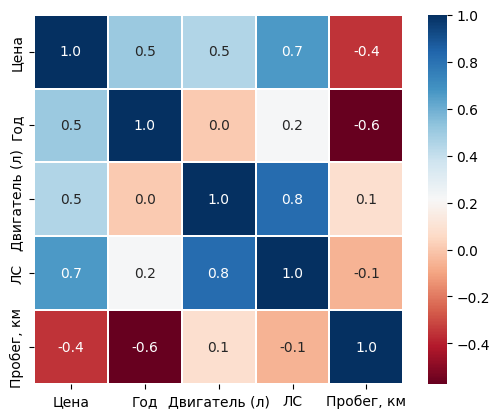

In [219]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

sns.heatmap(df[num_columns].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");